In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [3]:
initial_data = yf.download("AAPL ^VIX", start ="2020-03-01", end="2021-03-01")

[*********************100%***********************]  2 of 2 completed


In [4]:
initial_data.head()

Adj Close                 Close                  High             \
                 AAPL       ^VIX       AAPL       ^VIX       AAPL       ^VIX   
Date                                                                           
2020-03-02  74.127892  33.419998  74.702499  33.419998  75.360001  40.410000   
2020-03-03  71.773636  36.820000  72.330002  36.820000  76.000000  41.060001   
2020-03-04  75.102829  31.990000  75.684998  31.990000  75.849998  35.580002   
2020-03-05  72.666725  39.619999  73.230003  39.619999  74.887497  42.840000   
2020-03-06  71.701706  41.939999  72.257500  41.939999  72.705002  54.389999   

                  Low                  Open                Volume       
                 AAPL       ^VIX       AAPL       ^VIX       AAPL ^VIX  
Date                                                                    
2020-03-02  69.430000  31.500000  70.570000  38.540001  341397200    0  
2020-03-03  71.449997  24.930000  75.917503  33.650002  319475600    0  
2020-03-04  73.282501  30.299999  74.110001  34.439999  219178400    0  
2020-03-05  72.852501  33.540001  73.879997  33.610001  187572800    0  
2020-03-06  70.307503  40.840000  70.500000  48.930000  226176800    0

In [5]:
initial_data['Adj Close'].head()

,AAPL,^VIX
Date,,
2020-03-02,74.127892,33.419998
2020-03-03,71.773636,36.820000
2020-03-04,75.102829,31.990000
2020-03-05,72.666725,39.619999
2020-03-06,71.701706,41.939999


In [6]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-03-02 to 2021-02-26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    251 non-null    float64
 1   ^VIX    251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

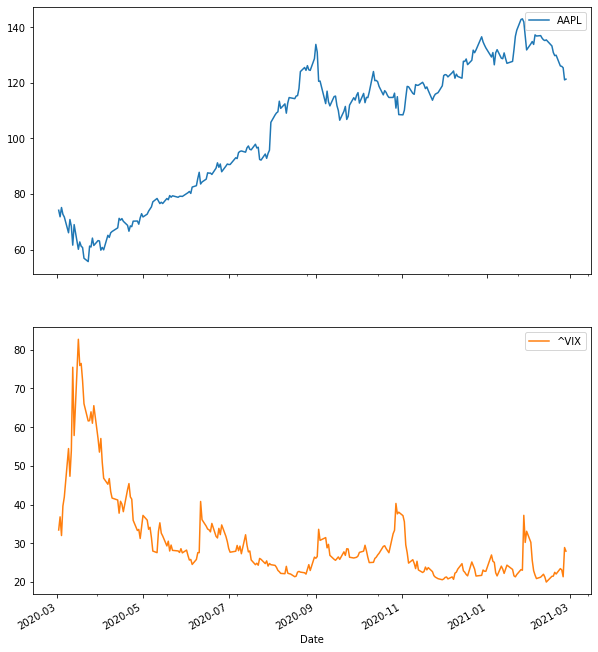

In [7]:
data.plot(figsize=(10, 12), subplots=True)

In [8]:
data.describe().round(2)

,AAPL,^VIX
count,251.00,251.00
mean,103.37,30.47
std,24.00,11.23
min,55.66,19.97
25%,79.73,23.22
50%,112.37,26.97
75%,122.65,33.07
max,142.95,82.69


In [9]:
data.diff().head()

,AAPL,^VIX
Date,,
2020-03-02,NaN,NaN
2020-03-03,-2.354256,3.400002
2020-03-04,3.329193,-4.830000
2020-03-05,-2.436104,7.629999
2020-03-06,-0.965019,2.320000


In [10]:
data.diff().describe().round(2)

,AAPL,^VIX
count,250.00,250.00
mean,0.19,-0.02
std,2.69,3.66
min,-10.49,-17.64
25%,-1.09,-1.37
50%,0.15,-0.30
75%,1.71,0.90
max,10.02,24.86


In [11]:
data.pct_change().round(4).head()

,AAPL,^VIX
Date,,
2020-03-02,NaN,NaN
2020-03-03,-0.0318,0.1017
2020-03-04,0.0464,-0.1312
2020-03-05,-0.0324,0.2385
2020-03-06,-0.0133,0.0586


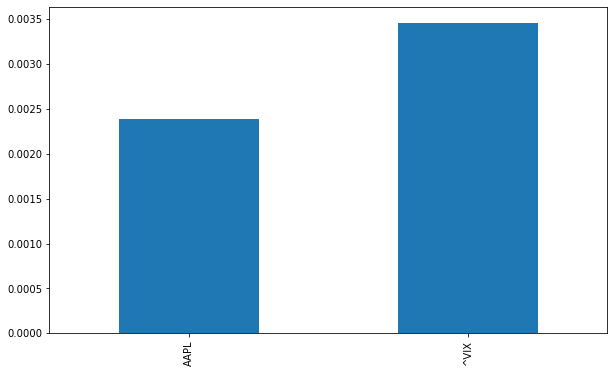

In [12]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [13]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,AAPL,^VIX
Date,,
2020-03-02,NaN,NaN
2020-03-03,-0.0323,0.0969
2020-03-04,0.0453,-0.1406
2020-03-05,-0.0330,0.2139
2020-03-06,-0.0134,0.0569


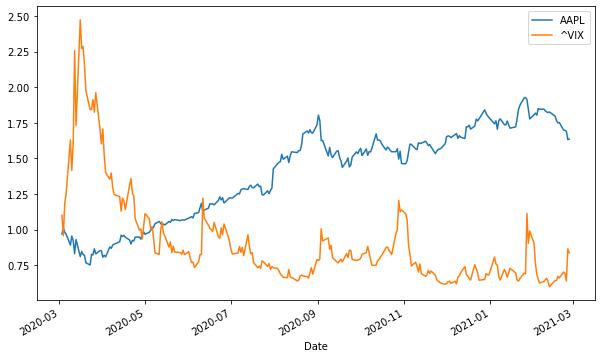

In [14]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [17]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2021-05-07')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL210507P00075000,2021-04-05 16:52:05,75.0,0.06,0.02,0.05,0.000000,0.000000,5,12,0.691409,False,REGULAR,USD
1,AAPL210507P00080000,2021-04-06 19:27:01,80.0,0.04,0.05,0.07,-0.020000,-33.333336,11,60,0.652347,False,REGULAR,USD
2,AAPL210507P00085000,2021-04-06 13:32:59,85.0,0.08,0.08,0.10,-0.070000,-46.666670,4,45,0.605473,False,REGULAR,USD
3,AAPL210507P00090000,2021-04-06 17:11:20,90.0,0.12,0.11,0.14,0.000000,0.000000,36,48,0.553715,False,REGULAR,USD
4,AAPL210507P00095000,2021-04-06 14:55:48,95.0,0.17,0.17,0.18,0.000000,0.000000,24,211,0.501958,False,REGULAR,USD
5,AAPL210507P00100000,2021-04-06 19:24:49,100.0,0.23,0.21,0.24,-0.010000,-4.166663,141,854,0.448736,False,REGULAR,USD
6,AAPL210507P00105000,2021-04-06 19:36:55,105.0,0.33,0.31,0.35,-0.040000,-10.810808,93,325,0.399420,False,REGULAR,USD
7,AAPL210507P00107000,2021-04-06 17:50:30,107.0,0.41,0.37,0.42,-0.030000,-6.818182,66,362,0.381842,False,REGULAR,USD
8,AAPL210507P00108000,2021-04-06 17:18:40,108.0,0.45,0.41,0.46,-0.070000,-13.461537,49,252,0.372809,False,REGULAR,USD
9,AAPL210507P00109000,2021-04-06 19:17:01,109.0,0.48,0.46,0.51,-0.070000,-12.727277,27,113,0.364752,False,REGULAR,USD


In [18]:
data = yf.download("AAPL", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [19]:
data['Adj Close']

Date
2020-03-02     74.127892
2020-03-03     71.773636
2020-03-04     75.102829
2020-03-05     72.666725
2020-03-06     71.701706
                 ...    
2021-02-22    126.000000
2021-02-23    125.860001
2021-02-24    125.349998
2021-02-25    120.989998
2021-02-26    121.260002
Name: Adj Close, Length: 251, dtype: float64

In [20]:
S = data['Adj Close'][-1]
K = opt.puts['strike']
T = 1/12
r = 0.0083
q = 0.0069
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.45732933573445084

In [21]:
data = yf.download("AAPL", start="2020-09-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [65]:
S = data['Adj Close'][-1]
K = opt.puts['strike']
T = 1/12
r = 0.0083
q = 0.03
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.37784909941441586

In [97]:
S0 = 126             # spot stock price
K = 120               # strike
T = 1/12                 # maturity 
r = 0.0083                 # risk free rate 
sig = 0.46               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [101]:
def binary_option_bs(S, K, T, r, sig, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #sig: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [102]:
binary_option_bs(126, 120, 1/12, 0.0083, 0.46, 'put')

0.379450185796959

In [103]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [104]:
T = 1/12
r = 0.0083
sigma = 0.46
S0 = 126
K = 120

In [105]:
S = mcs_simulation_np(1000)

In [106]:
S = np.transpose(S)
S

array([[126.        , 126.34462283, 126.5995278 , ..., 137.55437545,
        136.85607416, 137.49148497],
       [126.        , 126.88672106, 126.69420223, ..., 104.4432688 ,
        104.17204367, 104.46749779],
       [126.        , 125.99004344, 126.24911735, ...,  94.212929  ,
         94.89322681,  94.4812127 ],
       ...,
       [126.        , 125.77305441, 124.96893844, ..., 110.65056777,
        111.24133693, 111.20197388],
       [126.        , 125.3779625 , 124.74581558, ..., 130.53097917,
        130.09154558, 129.7192429 ],
       [126.        , 126.56836333, 125.84980345, ..., 118.92733051,
        119.17307819, 118.81811553]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

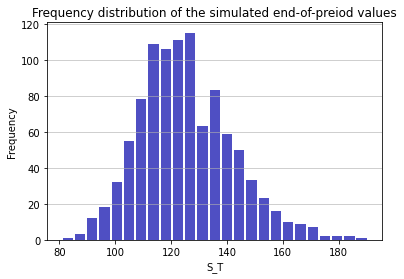

In [107]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [108]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 0.03296703296703297


In [109]:
def binary_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [110]:
binary_option_bsm(126, 120, 1/12, 0.0083, 0.03, 0.46, 'put')

0.3866321831007985

In [111]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = binary_option_bsm(S[i], 120, 1/12, 0.0083, 0.03, 0.46, 'call')
    Put [i] = binary_option_bsm(S[i], 120, 1/12, 0.0083, 0.03, 0.46, 'put')

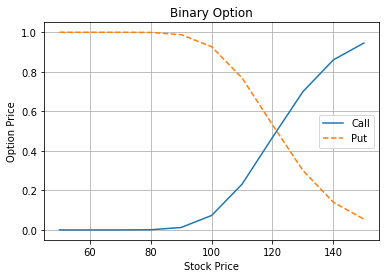

In [112]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Binary Option')
plt.legend(['Call','Put'])

In [113]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta =  np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / (vol * S * np.sqrt(T))
    elif payoff == "put":
        delta =   np.exp(-r * T) * si.norm.pdf(-d2, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return delta

In [114]:
delta(126, 120, 1/12, 0.0083, 0.03, 0.46, 'put')

0.022863080472357633

In [115]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 120, 1/12, 0.0083, 0.03, 0.46, 'call')
    Delta_Put [i] = delta(S[i], 120, 1/12, 0.0083, 0.03, 0.46, 'put')

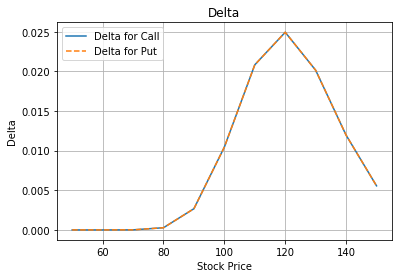

In [116]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [117]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(-d2, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [118]:
gamma(126, 120, 1/12, 0.0083, 0.03, 0.46, 'put')

0.022863080472357633

In [119]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 120, 1/12, 0.0083, 0.03, 0.46, 'put')

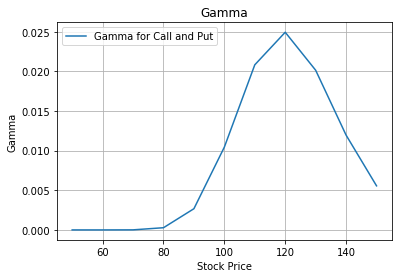

In [120]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [121]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + ((np.sqrt(T)) / vol) * (np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    elif payoff == "put":
        rho = T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - ((np.sqrt(T)) / vol) * (np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    
    return rho

In [122]:
rho(126, 120, 1/12, 0.0083, 0.03, 0.46, 'put')

-0.35226856264084166

In [123]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(126, 120, 1/12, 0.0083, 0.03, 0.46, 'call')
    Rho_Put [i] = rho(126, 120, 1/12, 0.0083, 0.03, 0.46, 'put')

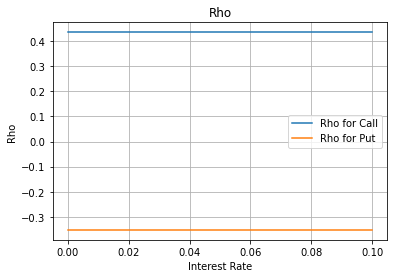

In [124]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [125]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = np.exp(-r * T) * si.norm.pdf(-d2, 0.0, 1.0) * (d1 / vol)
    
    return vega

In [126]:
vega(126, 120, 1/12, 0.0083, 0.03, 0.46, 'put')

0.3494378649324756

In [127]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(121, 120, 1/12, 0.0083, 0.03, vol[i], 'put')


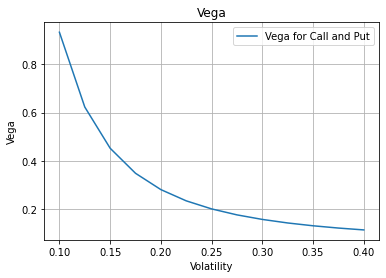

In [128]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])